# <center>Logistic回归</center>

本节重点：
* Sigmoid函数和Logistic回归分器
* 最优化理论初步
* 梯度下降最优化算法
* 数据中的缺失项处理

## 一、基于Logistic回归和Sigmoid函数的分类

* 用于非线性的分类
* 界越函数的难点，是0到1的瞬间跳跃很难处理 


__Sigmoid函数__
$$ \delta(z) = \frac{1}{1+e^{-z}}$$

In [ ]:
def sigmoid(inX):
    return 1.0/(1+exp(-inX))

<img src='fig\5-2.png' width='500'> 

## sigmoid函数展示

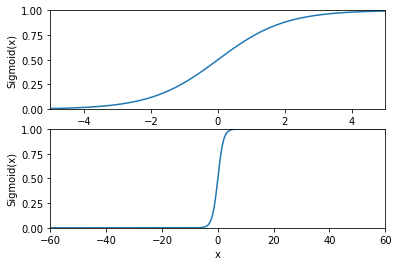

In [26]:
import sys
from pylab import *

t = arange(-60.0, 60.3, 0.1)
s = 1/(1 + exp(-t))
ax = subplot(211)
ax.plot(t,s)
ax.axis([-5,5,0,1])
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')

ax = subplot(212)
ax.plot(t,s)
ax.axis([-60,60,0,1])
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
show()

## 二、基于优化方法的最佳回归系数确定

### 1.梯度上升算法（最优化算法）
* 思想：要找到某个函数的最大值，沿着梯度往上找。
* 记号：$ \bigtriangledown  $
$$ \bigtriangledown f(x,y) = \left \{ 
\begin{aligned}
\frac{\partial f(x,y)}{\partial x} \\
\frac{\partial f(x,y)}{\partial y} \\
\end{aligned}
\right \}$$

函数$f(x,y)$在计算点上有定义并且可微。

<img src='fig\5-1.png' width='500'> 

梯度上升算法的迭代公式：$$w:=w+\alpha \bigtriangledown_{w}f(w) $$
__找最大值__

$\alpha$是变量移动的步长

梯度下降算法的迭代公式：$$w:=w-\alpha \bigtriangledown_{w}f(w) $$
__找最小值__

### 2.算法训练过程

梯度上升法  ---》  最佳回归系数（即拟合出Logistic回归模型的最佳参数）
```
伪代码：
    每个回归系数初始化为1
    重复R次：
        计算整个数据集的梯度
        使用alpha*gradient跟新回归系数的向量
    返回回归系数
```
testSet.txt 的文件
```
X1            X2     类别标签
-0.017612	14.053064	0 
-1.395634	4.662541	1
-0.752157	6.538620	0
-1.322371	7.152853	0
0.423363	11.054677	0
0.406704	7.067335	1
0.667394	12.741452	0
-2.460150	6.866805	1
0.569411	9.548755	0
```

In [ ]:
def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        # 这里由于要拟合的方程是 y = wx + b 的一元二次方程，所以只要一个权重
        # 我们初始化这个权重为 1.0 但这边的1 应该指的是 b （方程的常数项参数）
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

def sigmoid(inX):
    return 1.0/(1+exp(-inX))

def gradAscent(dataMatIn, classLabels):  #梯度上升算法
    dataMatrix = mat(dataMatIn)   
    #转换为NumPy矩阵 #convert to NumPy matrix
    labelMat = mat(classLabels).transpose() #convert to NumPy matrix
    m,n = shape(dataMatrix)   #m 行  n 列
    alpha = 0.001   #移动的步长
    maxCycles = 500  #迭代的次数
    
    weights = ones((n,1))  #三列 向量
    
    初始化权重为1
    [[ 1.]
     [ 1.]
     [ 1.]]
    
    """ for 循环结束后返回训练好的回归系数"""
    
    
                    #迭代的次数                                  #矩阵操作
    for k in range(maxCycles):              #heavy on matrix  operations
        h = sigmoid(dataMatrix*weights)   #矩阵相乘  #matrix mult
        error = (labelMat - h)            #向量减法  #vector subtraction
        weights = weights + alpha * dataMatrix.transpose()* error atrix mult
    return weights


#注意这里的每次迭代都是

#### 权重更新算法
$$w(j) = w(j) + \bigtriangledown w(j)$$
$$\bigtriangledown w(j) = \eta \times (y - y^{、}) \times x(j) $$

error  就是 $y - y^{、}$   error = (labelMat - h) 



weights = weights + alpha * dataMatrix.transpose()* error

__转至函数 transpose()__
#### 对于梯度上升法函数的讲解

<img src='fig\5-1.jpeg' width='500'> 

该梯度下降算法是基于和差距离公式的，对于和差公式距离的梯度下降算法，请看神经网络的部分的代码解释。

In [ ]:
dataMatrix = mat(dataMatIn)

print dataMatrix  将  dataMatIn 数组转换为 dataMatrix 举证
[[  1.00000000e+00  -1.76120000e-02   1.40530640e+01]
 [  1.00000000e+00  -1.39563400e+00   4.66254100e+00]
 [  1.00000000e+00  -7.52157000e-01   6.53862000e+00]
 [  1.00000000e+00  -1.32237100e+00   7.15285300e+00]
 [  1.00000000e+00   4.23363000e-01   1.10546770e+01]

 mat(classLabels)
 
 [[0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0
  0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1
  0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0]]
 
 mat(classLabels).transpose()  转置
 
 [[0]
 [1]
 [0]
 [0]
 [0]
 [1]
  


In [1]:
import logRegres

In [2]:
dataArr,labelMat = logRegres.loadDataSet()

In [3]:
print dataArr
print '-----------------------'
print labelMat

[[1.0, -0.017612, 14.053064], [1.0, -1.395634, 4.662541], [1.0, -0.752157, 6.53862], [1.0, -1.322371, 7.152853], [1.0, 0.423363, 11.054677], [1.0, 0.406704, 7.067335], [1.0, 0.667394, 12.741452], [1.0, -2.46015, 6.866805], [1.0, 0.569411, 9.548755], [1.0, -0.026632, 10.427743], [1.0, 0.850433, 6.920334], [1.0, 1.347183, 13.1755], [1.0, 1.176813, 3.16702], [1.0, -1.781871, 9.097953], [1.0, -0.566606, 5.749003], [1.0, 0.931635, 1.589505], [1.0, -0.024205, 6.151823], [1.0, -0.036453, 2.690988], [1.0, -0.196949, 0.444165], [1.0, 1.014459, 5.754399], [1.0, 1.985298, 3.230619], [1.0, -1.693453, -0.55754], [1.0, -0.576525, 11.778922], [1.0, -0.346811, -1.67873], [1.0, -2.124484, 2.672471], [1.0, 1.217916, 9.597015], [1.0, -0.733928, 9.098687], [1.0, -3.642001, -1.618087], [1.0, 0.315985, 3.523953], [1.0, 1.416614, 9.619232], [1.0, -0.386323, 3.989286], [1.0, 0.556921, 8.294984], [1.0, 1.224863, 11.58736], [1.0, -1.347803, -2.406051], [1.0, 1.196604, 4.951851], [1.0, 0.275221, 9.543647], [1.0,

In [4]:
logRegres.gradAscent(dataArr,labelMat)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

### 3.分析数据：画出决策边界

In [ ]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat,labelMat=loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]  #数据有多少行
    
#如果取数据写成这个样子就不用，转换啦～～
#
    
    
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    
    for i in range(n):
        if int(labelMat[i])== 1:  #按照标签进行分类
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
            
            
            
    fig = plt.figure()
    ax = fig.add_subplot(111)  #ax是图片的不就
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    
   # 为什么y要这样设置值
    
    ax.plot(x, y)
    
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

In [5]:
from numpy import *

In [6]:
weights = logRegres.gradAscent(dataArr,labelMat)

### getA()函数 
*  matrix.getA() = array
* 区别：matrix 和 array
    * array 可以是多维度，但 matrix 只能是二维 矩阵

In [7]:
import numpy as np
x = np.matrix(np.arange(12).reshape((3,4)))
print(x)
print (type(x))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
<class 'numpy.matrixlib.defmatrix.matrix'>


In [8]:
print (x.getA())
print (type(x.getA()))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
<type 'numpy.ndarray'>


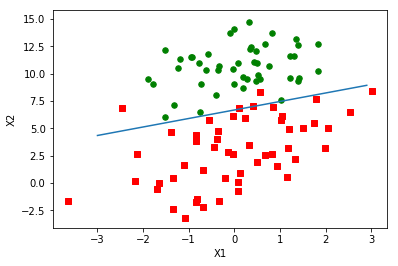

In [9]:
logRegres.plotBestFit(weights.getA())

In [17]:
#写一个函数画出原来的数据分布
def plotBeforPlot():
    import matplotlib.pyplot as plt
    import numpy as np
    dataMat, labelMat = logRegres.loadDataSet()
    dataArr = np.array(dataMat)
    n = shape(dataArr)[0]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x = dataArr[:,1]
    y = dataArr[:,2]
    ax.scatter(x,y,s=30,c='black')  #画散点图
    plt.show()
    pass

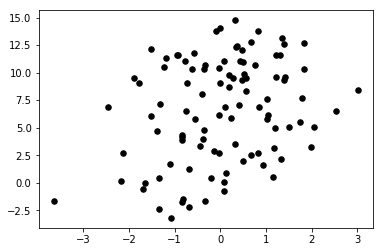

In [18]:
plotBeforPlot()

## 3.训练算法：随机梯度上升

梯度上升算法，每次更新回归系数的时候都需要将整个数据集遍历完，（这样时间复杂度太高了），我们从更新计算是的公式可以观察到，每次全职的更新都是每个样例的误差和。

改进办法：__随机梯度上升算法__

每次仅用一个样本点来更新回归系数。
* 它是__在线学习算法__【新样本到来时对分类器进行了增量式的更新】
* 与在线学习相对的是 __离线学习__ 即 __批处理__ 如上述梯度上升算法



随机梯度上升伪代码：
```
所有回归系数初始化为1
对数据集中每个样本
     计算该样本的梯度
     使用  alpha 乘以  gradient 更新回归系数值
返回回归系数
```

梯度上升伪代码：
```

    每个回归系数初始化为1
    重复R次：
        计算整个数据集的梯度
        使用alpha*gradient跟新回归系数的向量
    返回回归系数
```

对比：
* 对比之后可以很明显看书 随机梯度上升代码 计算的是每个样本的梯度 而梯度上升算法计算的是 整个数据集的梯度

In [ ]:
#随机梯度上升算法的代码：
def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)   #n列 表示有多少权值     m行 数据集的个数
    alpha = 0.01
    weights = ones(n)   #initialize to all ones  
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))  #计算的标签值
        
        sum(dataMatrix[i]*weights)  #是 sigmoid函数的输入值
        
        error = classLabels[i] - h   #误差
        weights = weights + alpha * error * dataMatrix[i]  #权职的更新
        
    return weights  最后返回

#梯度上升算法的代码：
def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)             #convert to NumPy matrix
    labelMat = mat(classLabels).transpose() #convert to NumPy matrix
    m,n = shape(dataMatrix)
    alpha = 0.001   #移步的长度   即  学习因子
    maxCycles = 500
    weights = ones((n,1))
    for k in range(maxCycles):              #heavy on matrix operations
        h = sigmoid(dataMatrix*weights)     #matrix mult
        error = (labelMat - h)              #vector subtraction
        weights = weights + alpha * dataMatrix.transpose()* error #matrix mult
    return weights

In [22]:
import logRegres
dataArr,labelMat = logRegres.loadDataSet()

In [23]:
weights = logRegres.stocGradAscent0(array(dataArr),labelMat)

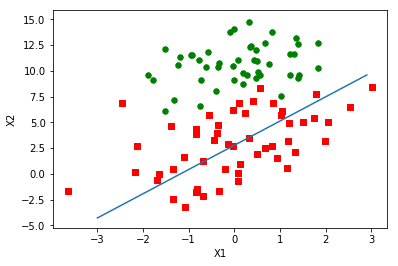

In [24]:
logRegres.plotBestFit(weights)

但是对比连个实验，随机梯度上升算法似乎在准确度上不是很高。

可以看出最佳拟合曲线 并不是 最佳分类曲线 （原因迭代次数少）

## 判断一个算法的优劣：算法内否收敛，即参数达到稳定状态。

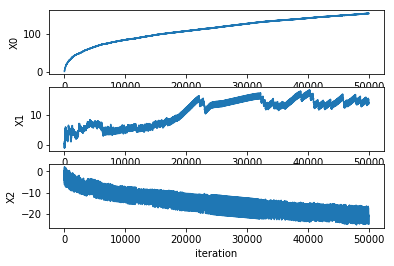

In [30]:
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import logRegres

def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.5
    weights = ones(n)   #initialize to all ones
    weightsHistory=zeros((500*m,n))
    for j in range(500):
        for i in range(m):
            h = logRegres.sigmoid(sum(dataMatrix[i]*weights))
            error = classLabels[i] - h
            weights = weights + alpha * error * dataMatrix[i]
            weightsHistory[j*m + i,:] = weights
    return weightsHistory

def stocGradAscent1(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.4
    weights = ones(n)   #initialize to all ones
    weightsHistory=zeros((40*m,n))
    for j in range(40):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.01
            randIndex = int(random.uniform(0,len(dataIndex)))
            h = logRegres.sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            #print error
            weights = weights + alpha * error * dataMatrix[randIndex]
            weightsHistory[j*m + i,:] = weights
            del(dataIndex[randIndex])
    print weights
    return weightsHistory
    

dataMat,labelMat=logRegres.loadDataSet()
dataArr = array(dataMat)
myHist = stocGradAscent0(dataArr,labelMat)


n = shape(dataArr)[0] #number of points to create
xcord1 = []; ycord1 = []
xcord2 = []; ycord2 = []

markers =[]
colors =[]


fig = plt.figure()
ax = fig.add_subplot(311)
type1 = ax.plot(myHist[:,0])
plt.ylabel('X0')
ax = fig.add_subplot(312)
type1 = ax.plot(myHist[:,1])
plt.ylabel('X1')
ax = fig.add_subplot(313)
type1 = ax.plot(myHist[:,2])
plt.xlabel('iteration')
plt.ylabel('X2')
plt.show()

### 改进随机梯度上升算法

改进算法的两个思路：
* 1.变化的学习因子alpha
    * 好处：缓解数据的波动或者高频波动
    * 当 j << max(i) 时，alpha就不是严格下降的。
    * 代码（具体实现）：alpha = 4/(1.0+j+i)+0.0001
    * 由上式可以看出，分母不断增大，alpha就不不断减小，但永远也不会减少到0，因为里面有常数项。这样就保证另外多次迭代之后，新数据仍然具有一定的影响力。
    * 公式含义：  
        * i：样本点的下标
        * j：迭代次数
        * 0.0001：常数项
        
        
* 随机选择样本：
    * 好处：将减少周期性的波动
    * 具体做法：每次随机从列表中选出一个值，然后从列表中删除掉该值

In [ ]:
改进随机梯度上升算法的代码：
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = shape(dataMatrix)
    weights = ones(n)   #initialize to all ones
    for j in range(numIter): 迭代次数
        dataIndex = range(m) 创建一个索引列表
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.0001    #apha decreases with iteration, does not 
            改进一：apha学习因子，每次迭代都会做出调整。alpha会随着迭代次数不断减小，但永远
            都不会减小到0（应为）
            randIndex = int(random.uniform(0,len(dataIndex)))  
            注意这是每次从新的索引列表中去数字
            
            随机选取样本来更新回归系数，这样将减少周期性的波动
            具体做法：每次随机从列表中选出一个值，然后从列表中删除掉该值，
            #go to 0 because of the constant
            
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex]) 删除随机到的元素
    return weights

随机梯度上升算法的代码：
def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)   n列 表示有多少权值     m行 数据集的个数
    alpha = 0.01
    weights = ones(n)   #initialize to all ones  
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))  计算的标签值
        
        sum(dataMatrix[i]*weights)  是 sigmoid函数的输入值
        
        error = classLabels[i] - h   误差
        weights = weights + alpha * error * dataMatrix[i]  权职的更新
        
    return weights  最后返回

uniform() 方法将随机生成下一个实数，它在 [x, y) 范围内。

In [46]:
import random

print "uniform(5, 10) 的随机数为 : ",  random.uniform(5, 10)

uniform(5, 10) 的随机数为 :  9.38073402181


del 删除函数

In [ ]:
>>> dataIndex = range(m)
>>> print dataIndex
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
>>> randIndex = int(random.uniform(0,len(dataIndex)))
>>> print randIndex
66
>>> del(dataIndex[randIndex])
>>> print dataIndex
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
>>> print dataIndex[66]
67

测试代码：

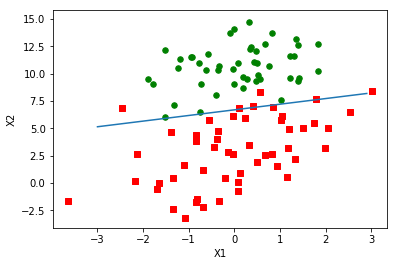

In [41]:
dataArr,labelMat = logRegres.loadDataSet()
weights = logRegres.stocGradAscent1(array(dataArr),labelMat,150)
logRegres.plotBestFit(weights)

修改迭代次数：

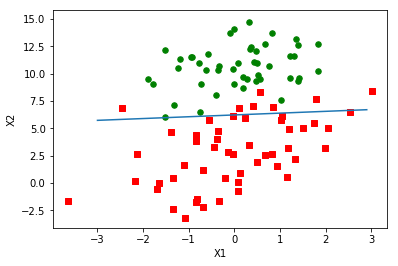

In [45]:
dataArr,labelMat = logRegres.loadDataSet()
weights = logRegres.stocGradAscent1(array(dataArr),labelMat,10)
logRegres.plotBestFit(weights)

记住看图对比的时候，要看这个分割线而不是数据点的分布。

[ 12.43535659   1.14645462  -1.9686869 ]


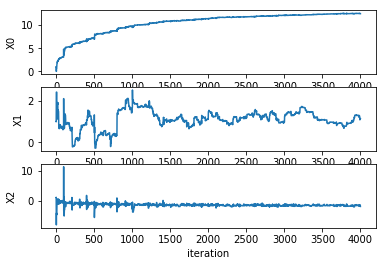

In [33]:
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import logRegres

def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.5
    weights = ones(n)   #initialize to all ones
    weightsHistory=zeros((500*m,n))
    for j in range(500):
        for i in range(m):
            h = logRegres.sigmoid(sum(dataMatrix[i]*weights))
            error = classLabels[i] - h
            weights = weights + alpha * error * dataMatrix[i]
            weightsHistory[j*m + i,:] = weights
    return weightsHistory

def stocGradAscent1(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.4
    weights = ones(n)   #initialize to all ones
    weightsHistory=zeros((40*m,n))
    for j in range(40):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.01
            randIndex = int(random.uniform(0,len(dataIndex)))
            h = logRegres.sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            #print error
            weights = weights + alpha * error * dataMatrix[randIndex]
            weightsHistory[j*m + i,:] = weights
            del(dataIndex[randIndex])
    print weights
    return weightsHistory
    

dataMat,labelMat=logRegres.loadDataSet()
dataArr = array(dataMat)
myHist = stocGradAscent1(dataArr,labelMat)


n = shape(dataArr)[0] #number of points to create
xcord1 = []; ycord1 = []
xcord2 = []; ycord2 = []

markers =[]
colors =[]


fig = plt.figure()
ax = fig.add_subplot(311)
type1 = ax.plot(myHist[:,0])
plt.ylabel('X0')
ax = fig.add_subplot(312)
type1 = ax.plot(myHist[:,1])
plt.ylabel('X1')
ax = fig.add_subplot(313)
type1 = ax.plot(myHist[:,2])
plt.xlabel('iteration')
plt.ylabel('X2')
plt.show()

In [ ]:
import Logistic
dataMat, labelMat = loadDataSet()
# 梯度上升法
weights2, weights_array2 = Logistic.gradAscent(dataMat, labelMat)
plotBestFit(weights2)
print(Logistic.gradAscent(dataMat, labelMat))


In [ ]:
#随机梯度上升法
weights0 = Logistic.stocGradAscent0(np.array(dataMat), labelMat)
plotBestFit(weights0)

In [ ]:
# 改进的随机梯度上升法
weights1, weights_array1 = Logistic.stocGradAscent1(np.array(dataMat), labelMat)
plotBestFit(weights1)
print(Logistic.stocGradAscent1(dataMat, labelMat))